# 22AIE304 Deep Learning
# Labsheet 2

## Name: Aniketh Vijesh
## Roll No: AM.EN.U4AIE22009

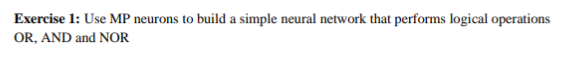

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1]:
class MPNeuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def activate(self, inputs):
        weighted_sum = np.dot(inputs, self.weights)

        return 1 if weighted_sum >= self.threshold else 0


def logical_operations():
    and_neuron = MPNeuron(weights=[1, 1], threshold=2)

    or_neuron = MPNeuron(weights=[1, 1], threshold=1)

    nor_neuron = MPNeuron(weights=[-1, -1], threshold=-1)

    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]

    and_results = [and_neuron.activate(x) for x in inputs]
    or_results = [or_neuron.activate(x) for x in inputs]
    nor_results = [nor_neuron.activate(x) for x in inputs]

    return {"AND": and_results, "OR": or_results, "NOR": nor_results}


if __name__ == "__main__":
    results = logical_operations()
    print("Results:")
    print("AND:", results["AND"])
    print("OR:", results["OR"])
    print("NOR:", results["NOR"])

Results:
AND: [0, 0, 0, 1]
OR: [0, 1, 1, 1]
NOR: [1, 1, 1, 0]


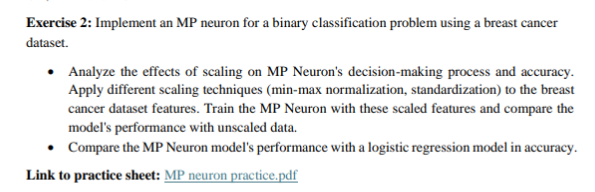

In [14]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
print(X.shape, y.shape)

(569, 30) (569,)


In [19]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [22]:
data["class"] = dataset.target

X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (512, 30) (57, 30)


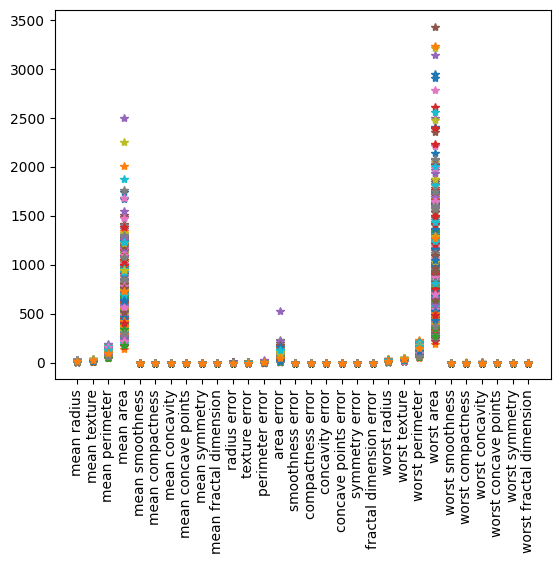

In [23]:
plt.plot(X_train.T, "*")
plt.xticks(rotation="vertical")
plt.show()

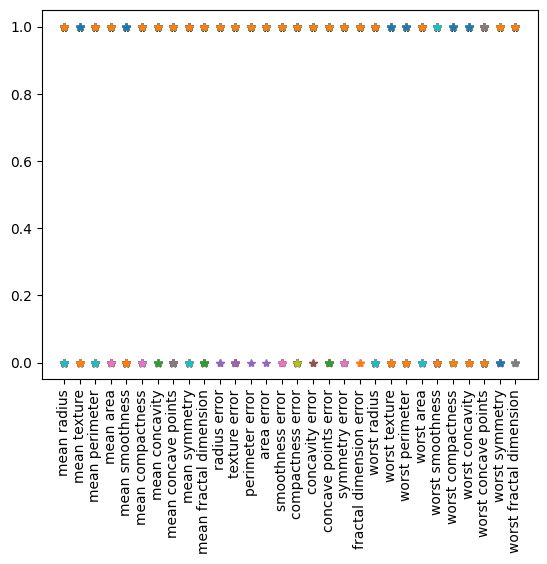

In [24]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1, 0])
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1, 0])
plt.plot(X_binarised_train.T, "*")
plt.xticks(rotation="vertical")
plt.show()

In [25]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [26]:
for b in range(X_binarised_train.shape[1] + 1):
    Y_pred_train = []
    accurate_rows = 0
    for x, y in zip(X_binarised_train, Y_train):
        y_pred = np.sum(x) >= b
        Y_pred_train.append(y_pred)
        accurate_rows += y == y_pred
    print(b, accurate_rows / X_binarised_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.630859375
14 0.6328125
15 0.640625
16 0.642578125
17 0.65625
18 0.66015625
19 0.666015625
20 0.677734375
21 0.697265625
22 0.7109375
23 0.74609375
24 0.779296875
25 0.80859375
26 0.845703125
27 0.861328125
28 0.857421875
29 0.826171875
30 0.751953125


In [27]:
class MPNeuron:
    def __init__(self):
        self.b = None

    def model(self, x):
        return sum(x) >= self.b

    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return Y

    def fit(self, X, Y):
        accuracy = {}
        for b in range(X.shape[1] + 1):
            self.b = b
            y_pred = self.predict(X)
            accuracy[b] = accuracy_score(y_pred, Y)
        best_b = max(accuracy, key=accuracy.get)
        self.b = best_b

        print("Optimal value of b is", best_b)
        print("Highest Accuracy is", accuracy[best_b])

In [28]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 27
Highest Accuracy is 0.861328125


In [29]:
y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(y_test_pred, Y_test)
print(accuracy_test)

0.7894736842105263


Now making a logistic regression model to see comparwe performances

Accuracy: 0.9766
Confusion Matrix:
[[ 61   2]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



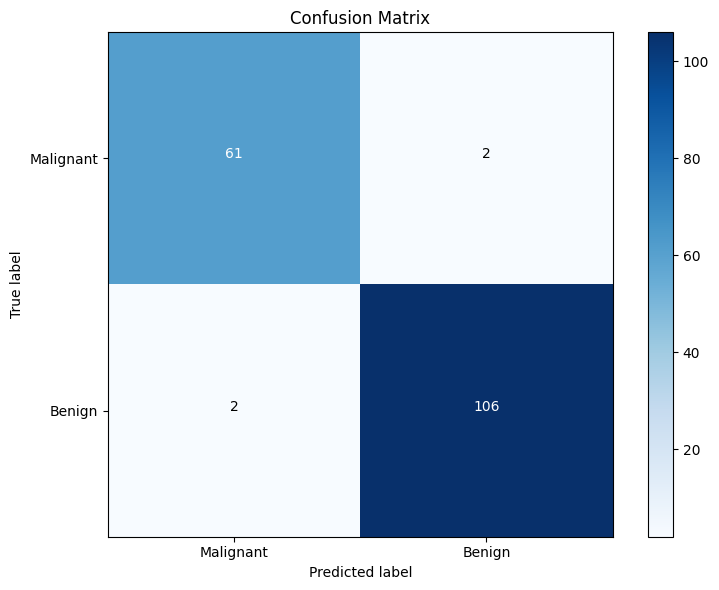

In [17]:
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Malignant", "Benign"])
plt.yticks(tick_marks, ["Malignant", "Benign"])

thresh = conf_matrix.max() / 2.0
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(
        j,
        i,
        format(conf_matrix[i, j], "d"),
        horizontalalignment="center",
        color="white" if conf_matrix[i, j] > thresh else "black",
    )

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

The Logistic Regression has as higher accuracy and better performance in comparison to the Perceptron

# Exercise 4

In [1]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data["target"] = iris.target

# Filter to only include Setosa and Versicolor
data = data[data["target"] != 2]

X = data[iris.feature_names]
y = data["target"].replace({0: 0, 1: 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.weight_matrix = []

        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

            self.weight_matrix.append(self.weights.copy())

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation(linear_output)

    def _activation(self, x):
        return np.where(x >= 0, 1, 0)

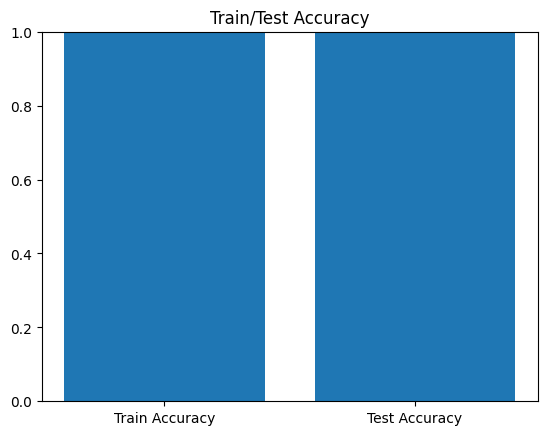

In [3]:
perceptron = Perceptron(learning_rate=0.1, n_epochs=100)
perceptron.fit(X_train.to_numpy(), y_train.to_numpy())

train_accuracy = np.mean(perceptron.predict(X_train.to_numpy()) == y_train.to_numpy())
test_accuracy = np.mean(perceptron.predict(X_test.to_numpy()) == y_test.to_numpy())

plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy])
plt.ylim(0, 1)
plt.title("Train/Test Accuracy")
plt.show()

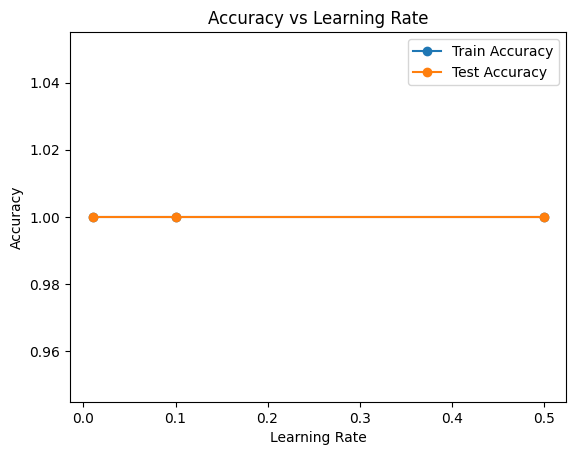

In [4]:
learning_rates = [0.01, 0.1, 0.5]
train_accuracies = []
test_accuracies = []

for lr in learning_rates:
    perceptron = Perceptron(learning_rate=lr, n_epochs=100)
    perceptron.fit(X_train.to_numpy(), y_train.to_numpy())

    train_accuracy = np.mean(
        perceptron.predict(X_train.to_numpy()) == y_train.to_numpy()
    )
    test_accuracy = np.mean(perceptron.predict(X_test.to_numpy()) == y_test.to_numpy())

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(learning_rates, train_accuracies, marker="o", label="Train Accuracy")
plt.plot(learning_rates, test_accuracies, marker="o", label="Test Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Learning Rate")
plt.legend()
plt.show()

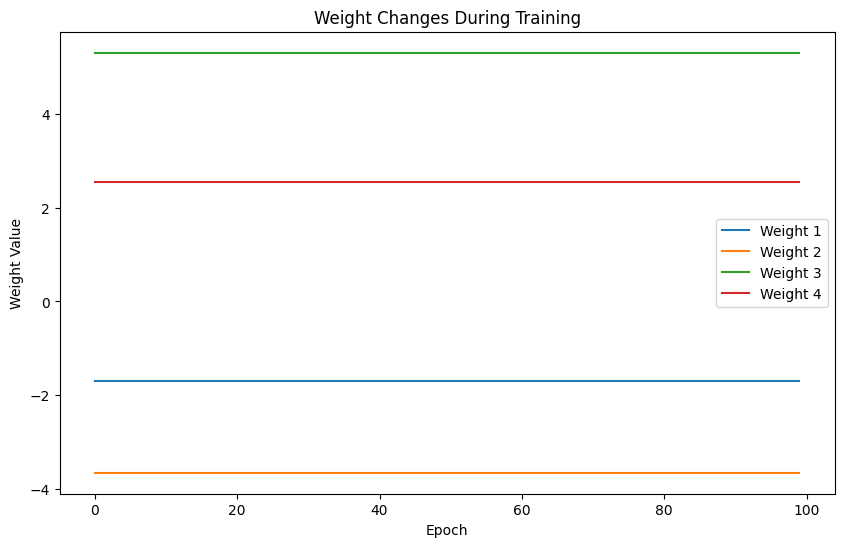

In [5]:
weight_matrix = np.array(perceptron.weight_matrix)

plt.figure(figsize=(10, 6))
for i in range(weight_matrix.shape[1]):
    plt.plot(weight_matrix[:, i], label=f"Weight {i + 1}")

plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("Weight Changes During Training")
plt.legend()
plt.show()